# Chapter 1: Foundations

"The aim of this chapter is to explain some foundational mental models that are essential for understanding how neural networks work. Specifically, we'll cover *nested mathematical functions and their derivatives*."

For foundational concepts, we'll introduce via three perspectives:
1. Math, in the form of equations
2. Code, with as little extra syntax as possible
3. A diagram explaining what is going on

"one of the challenges of understanding neural networks is that it requires multiple mental models"

## Dependencies

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
from typing import Callable

In [2]:


print("Python list operations")
a = [1,2,3]
b = [4,5,6]
print("a+b", a+b)

Python list operations
a+b [1, 2, 3, 4, 5, 6]


In [3]:
try:
    print(a*b)
except TypeError:
    print("a*b has no meaning for Python lists")

a*b has no meaning for Python lists


In [4]:
print("numpy array operations")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a + b =", a+b)
print("a * b =", a*b)

numpy array operations
a + b = [5 7 9]
a * b = [ 4 10 18]


In [5]:
a = np.array([[1,2,3],
              [4,5,6]]) 
print(a)


[[1 2 3]
 [4 5 6]]


Each dimension of the array has an associated axis, making it possible to do intuitive numerical calculations along the different axes. For a 2D array, `axis = 0` corresponds to rows, `axis = 1` corresponds to columns.

In [6]:
print('a:')
print(a)
print('a.sum(axis = 0):', a.sum(axis = 0))
print('a.sum(axis = 1):', a.sum(axis = 1))

a:
[[1 2 3]
 [4 5 6]]
a.sum(axis = 0): [5 7 9]
a.sum(axis = 1): [ 6 15]


In [7]:
b = np.array([10, 20, 30])
print("a + b:\n", a + b)

a + b:
 [[11 22 33]
 [14 25 36]]


Some basic functions in `numpy`

In [8]:
def square(x: ndarray) -> ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)


def leaky_relu(x: ndarray) -> ndarray:
    '''
    Apply "Leaky ReLU" function to each element in ndarray.
    '''
    return np.maximum(0.2 * x, x)


In [9]:
square(np.array([1,2,3,4,5,6]))

array([ 1,  4,  9, 16, 25, 36])

In [10]:
leaky_relu(np.array([1,2,-3,4,-5,6]))

array([ 1. ,  2. , -0.6,  4. , -1. ,  6. ])

## Derivatives

In [11]:
def derivative(func: Callable[[ndarray], ndarray],
               input_: ndarray,
               delta: float = 0.001) -> ndarray:
    '''
    Evaluatves the derivative of a function "func" at every element in 
    the "input_" array.
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

In [12]:
derivative(square, np.array([1,2,4,8,20]) )

array([ 2.,  4.,  8., 16., 40.])

# Nested functions

The idea of nesting functions such that the output of one becomes the input for another is crucial for understanding neural networks.

"computing derivatives of composite functions will turn out to be essential for training deep learning models" (11)

## Sigmoid

In [18]:
def sigmoid(x: ndarray) -> ndarray:
    '''
    Apply the sigmoid function to each element in the input ndarray.
    '''
    return 1 / (1 + np.exp(-x))

## Chain rule

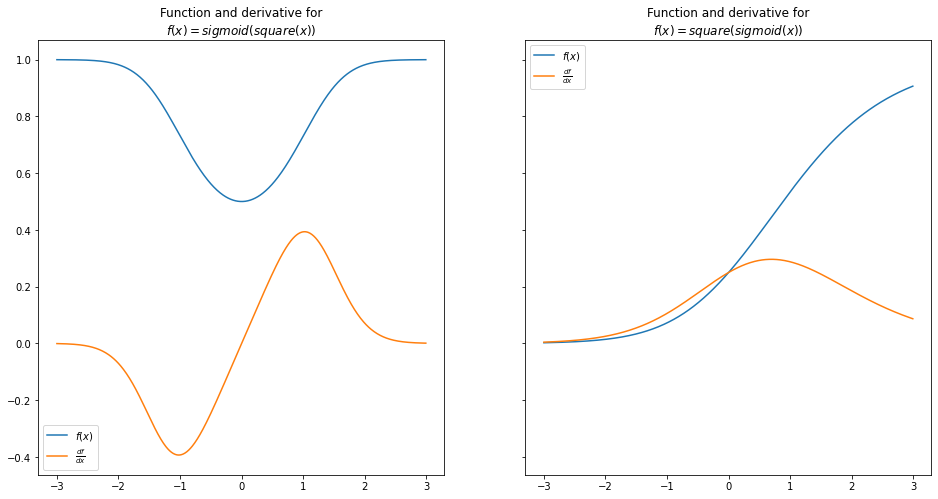

In [25]:
from typing import List

# A Function takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[Array_Function]


def chain_length_2(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Length of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))


def chain_deriv_2(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested functions:
    (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = derivative(f1, input_range)

    # df2/du(f1(x))
    df2du = derivative(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du


def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - 
    Across the input_range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    output_range = chain_length_2(chain, input_range)
    ax.plot(input_range, output_range)
    
    
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of a function consisting of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''
    output_range = chain_deriv_2(chain, input_range)
    ax.plot(input_range, output_range)
    
    
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain(ax[1], chain_2, PLOT_RANGE)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

"It will turn out that deep learning models are, mathematically, long chains of these mostly differentiable functions" (14)

## Longer example
"if we have three mostly differentiable functions, how would we go about computing the derivative of f1f2f3?" (14)
"Interestingly, already in this simple example we see the beginnings of what will become the forward and backward passes of a neural network"

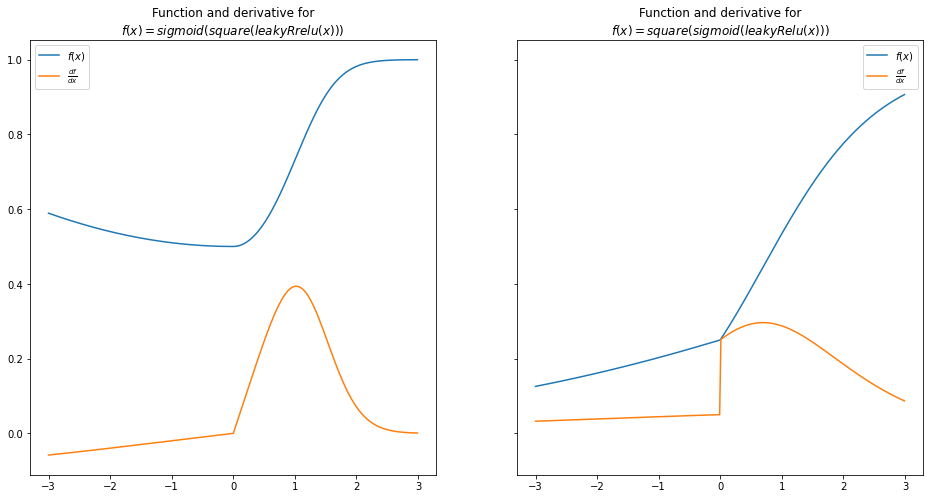

In [32]:
def chain_deriv_3(chain: Chain,
                  input_range: ndarray) -> ndarray:
    '''
    Uses the chain rule to compute the derivative of three nested functions:
    (f3(f2(f1)))' = f3'(f2(f1(x))) * f2'(f1(x)) * f1'(x)
    '''
    
    assert len(chain) == 3, \
    "This function requires 'Chain' objects to have length 3"
    
    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]
    
    # f1(x)
    f1_of_x = f1(input_range)
    
    # f2(f1_of_x)
    f2_of_x = f2(f1_of_x)
    
    # df3du
    df3du = derivative(f3, f2_of_x)
    
    # df2du
    df2du = derivative(f2, f1_of_x)
    
    # df1du
    df1dx = derivative(f1, input_range)
    
    ## Multiply these together at each point
    return df1dx * df2du * df3du


def plot_chain(ax,
               chain: Chain, 
               input_range: ndarray,
               length: int=2) -> None:
    '''
    Plots a chain function - a function made up of 
    multiple consecutive ndarray -> ndarray mappings - across one range
    
    ax: matplotlib Subplot for plotting
    '''
    
    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"
    if length == 2:
        output_range = chain_length_2(chain, input_range)
    elif length == 3:
        output_range = chain_length_3(chain, input_range)
    ax.plot(input_range, output_range)

    
def plot_chain_deriv(ax,
                     chain: Chain,
                     input_range: ndarray,
                     length: int=2) -> ndarray:
    '''
    Uses the chain rule to plot the derivative of two nested functions.
    
    ax: matplotlib Subplot for plotting
    '''

    if length == 2:
        output_range = chain_deriv_2(chain, input_range)
    elif length == 3:
        output_range = chain_deriv_3(chain, input_range)
    ax.plot(input_range, output_range)
    
    
def chain_length_3(chain: Chain,
                   x: ndarray) -> ndarray:
    '''
    Evaluates three functions in a row, in a "Chain".
    '''
    assert len(chain) == 3, \
    "Length of input 'chain' should be 3"

    f1 = chain[0]
    f2 = chain[1]
    f3 = chain[2]

    return f3(f2(f1(x)))


fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain(ax[0], chain_1, PLOT_RANGE, length=3)
plot_chain_deriv(ax[0], chain_1, PLOT_RANGE, length=3)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain(ax[1], chain_2, PLOT_RANGE, length=3)
plot_chain_deriv(ax[1], chain_2, PLOT_RANGE, length=3)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");